## Plotting Raw Data with Pyleoclim

This notebook lays out the details of how we plot raw data using [Pyleoclim](https://pyleoclim-util.readthedocs.io/en/latest/) objects that we loaded in the Load Data notebook.

The notebook is structured as follows:

1. Load and plot the raw records

In [1]:
# Importing relevant packages

import pickle

import pyleoclim as pyleo
import matplotlib.pyplot as plt

In [2]:
# Importing the data

with open('../../data/plotting_series_dict.pkl','rb') as handle:
    plotting_series_dict = pickle.load(handle)

with open('../../data/cmap_grouped.pkl','rb') as handle:
    cmap_grouped = pickle.load(handle)

with open('../../data/marker_dict.pkl','rb') as handle:
    marker_dict = pickle.load(handle)

Pyleoclim has some built-in plotting functionalities for multiple records (e.g. [stackplot](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.multipleseries.MultipleSeries.stackplot)), but we're going to do something slightly more bespoke as we want to have multiple columns:

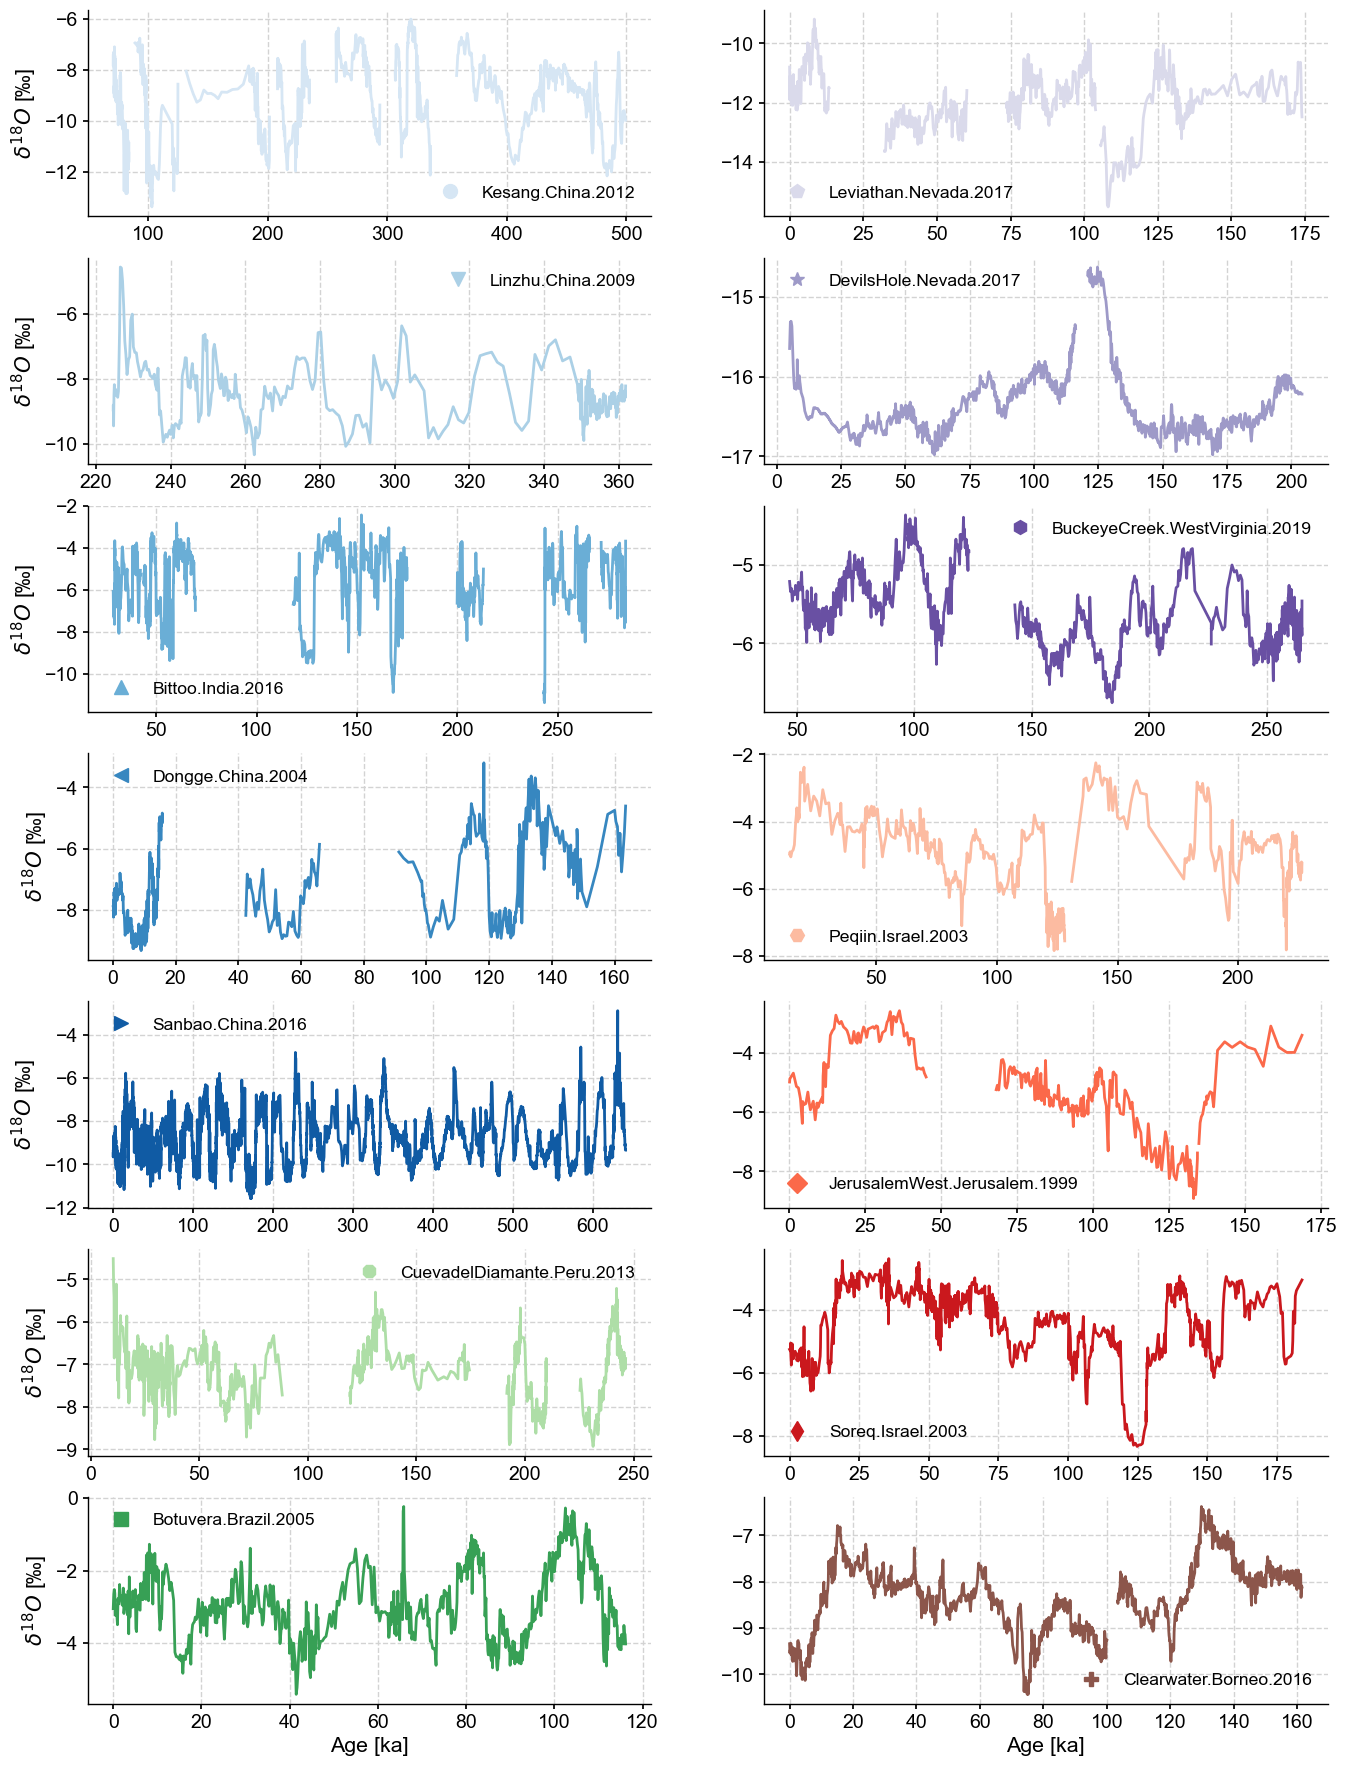

In [3]:
# Plotting the data

plot_order = [
    'Kesang.China.2012',
    'Linzhu.China.2009',
    'Bittoo.India.2016',
    'Dongge.China.2004',
    'Sanbao.China.2016',
    'CuevadelDiamante.Peru.2013',
    'Botuvera.Brazil.2005',
    'Leviathan.Nevada.2017',
    'DevilsHole.Nevada.2017',
    'BuckeyeCreek.WestVirginia.2019',
    'Peqiin.Israel.2003',
    'JerusalemWest.Jerusalem.1999',
    'Soreq.Israel.2003',
    'Clearwater.Borneo.2016',
]

fig = plt.figure(figsize=(16,22))
gs = fig.add_gridspec(7, 2)

for idx,label in enumerate(plot_order):
    ts = plotting_series_dict[label]
    if idx <= 6:
        gs_slot = gs[idx,0]
    else:
        gs_slot = gs[idx-7,1]

    ts.value_name = r'$\delta^{18}O$'
    ts.value_unit = u'‰'
    ax = fig.add_subplot(gs_slot)
    ts.plot(ax=ax,color=cmap_grouped[ts.label])
    ax.legend(handles=[plt.Line2D([0], [0], marker=marker_dict[label], color=cmap_grouped[label], label=label, markersize=10,linestyle='None')]).set_visible(True)
    
    if idx in [6,13]:
        pass
    else:
        ax.set_xlabel('')
    if idx in [0,1,2,3,4,5,6]:
        pass
    else:
        ax.set_ylabel('')